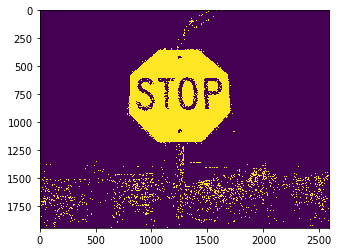

In [25]:
import cv2
import abc
import numpy as np
import matplotlib.pyplot as plt
from classifier import SimpleHSVRedClassifier

img = cv2.imread('../trainset/8.jpg')
img_ = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
clf = SimpleHSVRedClassifier()
res = clf.predict(img)
plt.imshow(res)
# plt.imshow(img)
res_ = res.copy()
GOGO = '../trainset/8.jpg'

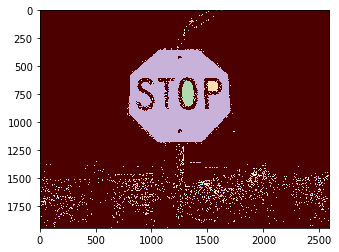

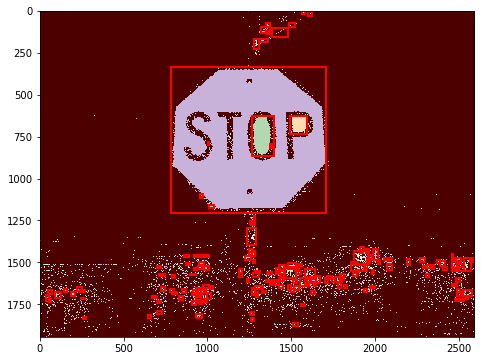

octagon 8
Total Area:  15116.544 , Region Area:  609251.5
[347.7062622168489, 344.7366985120541, 357.6055513388226, 5.661035899060153, 12.2937377831513, 15.263301487946137, 2.3944486611776483, 354.3389641009401]
8
half octagon


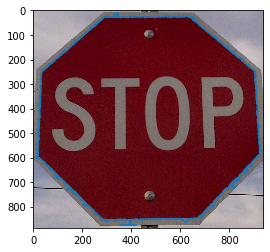

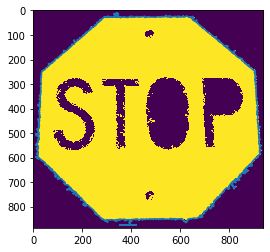

hexagon 6
Total Area:  15116.544 , Region Area:  19578.0


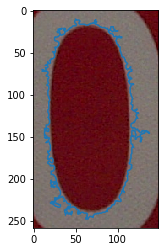

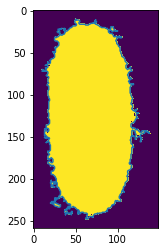

square 4
Total Area:  15116.544 , Region Area:  7230.5


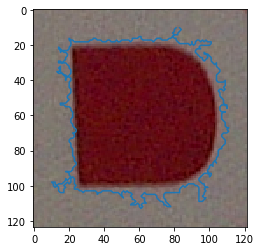

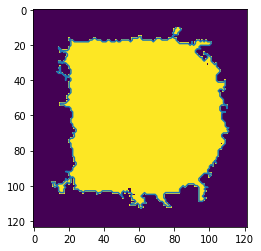

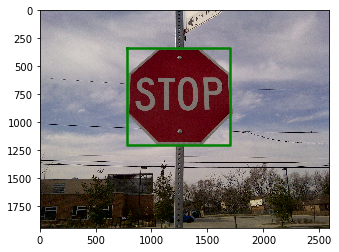

In [26]:
##### import math
from skimage.measure import label, regionprops, approximate_polygon
from skimage.color import label2rgb
import cv2
from classifier import SimpleHSVRedClassifier
from detector import *

img = cv2.imread(GOGO)
oimg = img.copy()
img_area = img.shape[0] * img.shape[1]
img_ = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
clf = SimpleHSVRedClassifier()
res = clf.predict(img)
# plt.imshow(res)
# plt.imshow(img)
res_ = res.copy()
        
label_image = label(res, connectivity=1)
image_label_overlay = label2rgb(label_image, image=res)

plt.imshow(image_label_overlay)
plt.show()


# ----------------------------------
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
for region in Region.find(res):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
plt.show()
# ----------------------------------

bbox = set()
for props in Region.find(res, cv2.cvtColor(img, cv2.COLOR_HSV2RGB)):
    if props.area >= 100:
        
        minr, minc, maxr, maxc = props.bbox
        lr = maxr - minr
        lc = maxc - minc
        
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        if max(lc, lr) - min(lc, lr) > 1.2 * min(lc, lr):
            continue

#         plt.imshow(props.original_image)
#         plt.show()
        
        cnts = Contour.find(props.padded_image(10))
        for contour in cnts:
            if contour.area > img_area * 0.001 and contour.area > props.bbox_area * 0.5:
                if not (props.image[props.image != 0].sum() > contour.area * 0.5):
                        continue
                    
                poly = contour.approx_polygon()
                print(poly.shape_name, poly.n_edges)
#                 print(list(map(lambda v: round(v, 2), poly.angles_deg)))
                print('Total Area: ', img_area * 0.003, ', Region Area: ', contour.area)

                if 7 <= poly.n_edges < 16:
                    degs = poly.angles_deg + poly.angles_deg
                    print([sum(degs[i:i+4]) % 360 for i in range(poly.n_edges)])
                    n_valid_angles = sum([
                        1 if \
                        160 < sum(degs[i:i+4]) % 360 < 200 or 160 < (sum(degs[i:i+4]) + 180)%360 < 200 \
                        else 0 for i in range(poly.n_edges)
                    ])
                    print(n_valid_angles)
                    if (n_valid_angles >= 2 and poly.n_edges <= 12) \
                        or (n_valid_angles >= 3 and poly.n_edges <= 16):
                        print('half octagon')
                        bbox.add((bx, by))
                
                # -----------------------------
#                 print(poly.numpy[:, 0, :])
#                 for i in range(poly.numpy.shape[0]):
#                     fig, ax = plt.subplots()
#                     ax.imshow(poly.padded_original_image(10))

#                     for j in range(i + 1):
#                         rect = mpatches.Rectangle((poly.numpy[i, 0, 0], poly.numpy[i, 0, 1]), 50, 50, fill=True)
#                         ax.add_patch(rect)
#                     plt.show()
                # -----------------------------
                
#                 appr = contour.approx_polygon_skimage().numpy
#                 plt.imshow(props.padded_original_image(10))
#                 plt.plot(appr[:, 0], appr[:, 1])
#                 plt.show()
#                 plt.imshow(props.padded_image(10))
#                 plt.plot(appr[:, 0], appr[:, 1])
#                 plt.show()
                
                appr = contour.numpy[:, 0, :]
                plt.imshow(props.padded_original_image(10))
                plt.plot(appr[:, 0], appr[:, 1])
                plt.show()
                plt.imshow(props.padded_image(10))
                plt.plot(appr[:, 0], appr[:, 1])
                plt.show()

plt.figure()
plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))
for bx, by in bbox:
    plt.plot(bx, by, '-g', linewidth=2.5)
plt.show()

In [24]:
GOGO = '../trainset/38.jpg'

{'_data': <skimage.measure._regionprops._RegionProperties at 0x1c784defe08>,
 '_original_image': array([[[144, 206, 253],
         [144, 206, 253],
         [144, 205, 252],
         ...,
         [154, 206, 252],
         [159, 202, 252],
         [159, 201, 250]],
 
        [[144, 206, 253],
         [144, 206, 253],
         [144, 205, 252],
         ...,
         [154, 207, 253],
         [158, 204, 250],
         [161, 203, 251]],
 
        [[143, 208, 251],
         [143, 208, 251],
         [143, 204, 252],
         ...,
         [154, 207, 253],
         [160, 205, 251],
         [162, 204, 252]],
 
        ...,
 
        [[ 96,  92,  99],
         [ 95,  91,  98],
         [ 95,  91,  98],
         ...,
         [176, 172, 160],
         [177, 173, 158],
         [178, 174, 159]],
 
        [[ 94,  88,  99],
         [ 94,  88,  99],
         [ 94,  88,  99],
         ...,
         [175, 172, 157],
         [177, 173, 158],
         [178, 174, 159]],
 
        [[ 94,  88,  98]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
../trainset/30.jpg


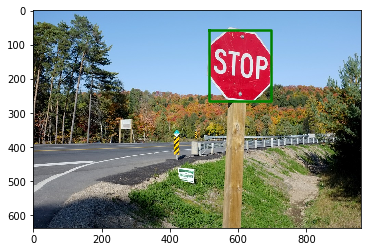

../trainset/31.jpg


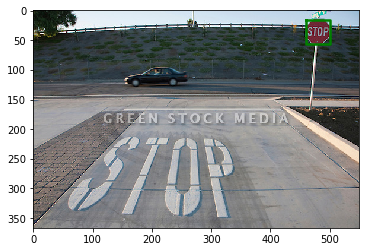

../trainset/32.jpg


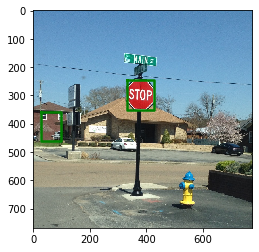

../trainset/33.jpg


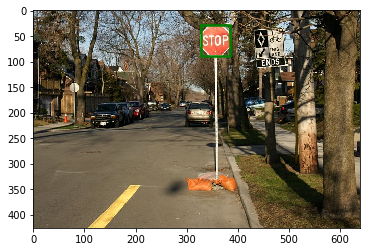

../trainset/36.jpg


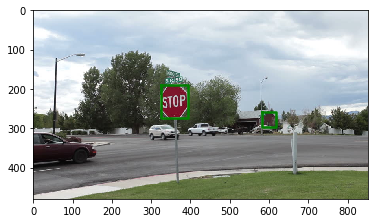

../trainset/37.jpg


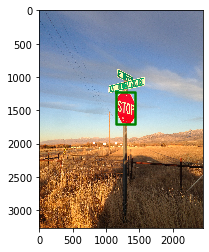

../trainset/38.jpg


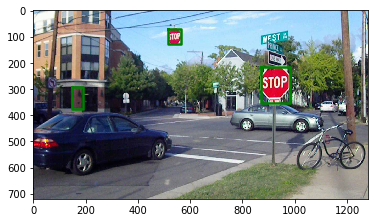

../trainset/39.jpg


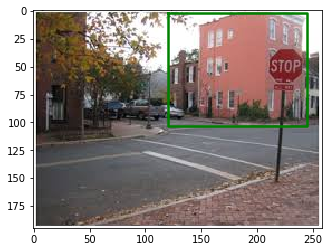

In [27]:
%load_ext autoreload
%autoreload 2
import math
from skimage.measure import label, regionprops, approximate_polygon
from skimage.color import label2rgb
import cv2
from detector import *
from classifier import *
def dodo(GOGO):
    img = cv2.imread(GOGO)
    oimg = img.copy()
    img_area = img.shape[0] * img.shape[1]
    img_ = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    clf = SimpleHSVRedClassifier()
    ssclf = SSBBoxDeterministicClassifier(img_area)
    res = clf.predict(img)
    # plt.imshow(res)
    # plt.imshow(img)
    res_ = res.copy()

    label_image = label(res, connectivity=1)
    image_label_overlay = label2rgb(label_image, image=res)
    
    
    bbox = []
    for region in Region.find(res, cv2.cvtColor(img, cv2.COLOR_HSV2RGB)):
        if ssclf.predict(region):
            bbox.append(region)
            
    print(GOGO)
    plt.figure()
    plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))
    for region in bbox:
        plt.plot(*region.pyplot_coordinates, '-g', linewidth=2.5)
    plt.show()

    
import sys
b = 30
for i in range(b, b + 10):
    file = f'../trainset/{i}.jpg'
    try:
        dodo(file)
    except:
        pass


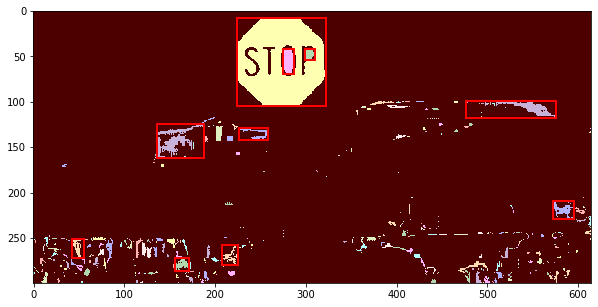

N_REGIONS 433


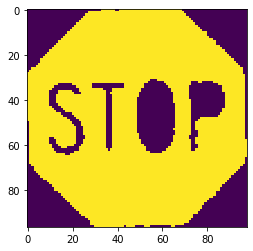

(0, 198) (97, 98)


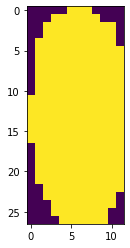

(0, 112) (27, 12)


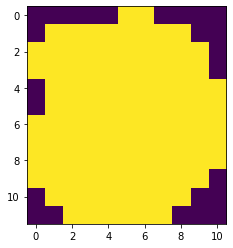

(0, 111) (12, 11)


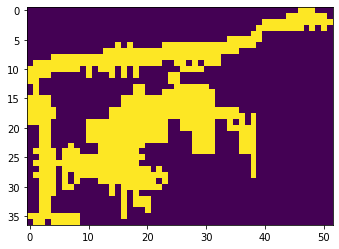

(137, 152) (37, 52)
(10, 1, 2)
----------------GOOOOOOOD---------------
Total Area:  553.5 , Region Area:  626.5
(10, 1, 2)


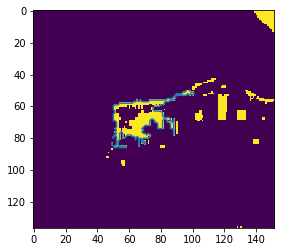

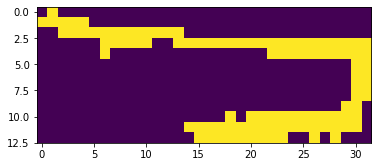

(113, 132) (13, 32)
(5, 1, 2)
pentagon
Total Area:  553.5 , Region Area:  1539.5
(5, 1, 2)


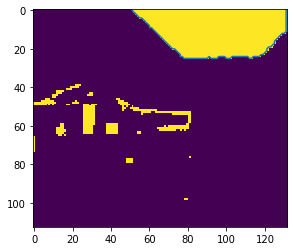

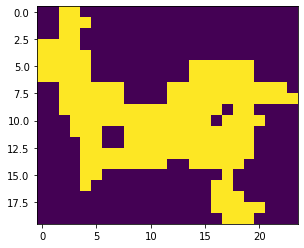

(120, 93) (20, 24)


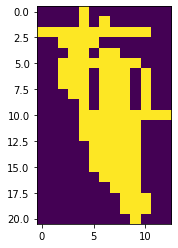

(99, 0) (21, 13)


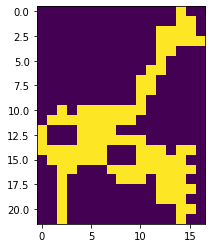

(92, 117) (22, 17)


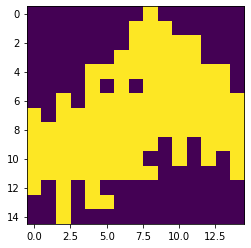

(78, 115) (15, 15)


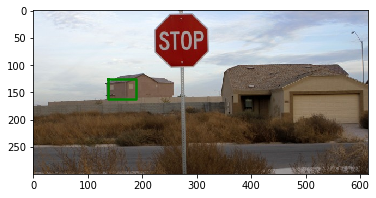

In [43]:
import math
from skimage.measure import label, regionprops, approximate_polygon
from skimage.color import label2rgb
import cv2

img = cv2.imread(GOGO)
oimg = img.copy()
img_area = img.shape[0] * img.shape[1]
img_ = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
clf = SimpleHSVRedClassifier()
res = clf.predict(img)
# plt.imshow(res)
# plt.imshow(img)
res_ = res.copy()

class ShapeDetector:
    def __init__(self):
        pass
 
    def detect(self, c):
        # initialize the shape name and approximate the contour
        shape = "unidentified"
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        print(approx.shape)
        if len(approx) == 3:
            shape = "triangle"

        # if the shape has 4 vertices, it is either a square or
        # a rectangle
        elif len(approx) == 4:
            # compute the bounding box of the contour and use the
            # bounding box to compute the aspect ratio
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)

            # a square will have an aspect ratio that is approximately
            # equal to one, otherwise, the shape is a rectangle
            shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

        # if the shape is a pentagon, it will have 5 vertices
        elif len(approx) == 5:
            shape = "pentagon"

        # otherwise, we assume the shape is a circle
        elif len(approx) == 6:
            shape = "hexagon"
        elif len(approx) in [7, 8, 9, 10]:
            shape = "----------------GOOOOOOOD---------------"
        else:
            print(len(approx))
            shape = "circle"

        # return the name of the shape
        return shape
    
        
label_image = label(res, connectivity=1)
image_label_overlay = label2rgb(label_image,  image=res)


# ----------------------------------
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)
for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
plt.show()
# ----------------------------------

sd = ShapeDetector()
regions = regionprops(label_image)
bbox = set()
print('N_REGIONS', len(regions))
for props in regions:
    if props.area >= 100:
        
        minr, minc, maxr, maxc = props.bbox
        lr = maxr - minr
        lc = maxc - minc
        
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        if max(lc, lr) - min(lc, lr) > 1.5 * min(lc, lr):
            continue

        g = res[minr-50:maxr+50, minc-50:maxc+50]

        plt.imshow(props.image)
        plt.show()
        print(g.copy().shape, props.image.shape)
        USE_CV2 = True
        if USE_CV2:
            cnts = cv2.findContours(g.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        else:
            cnts2 = find_contours(g, 0)

            
        for contour in (cnts if USE_CV2 else cnts2):
            if not USE_CV2 or cv2.contourArea(contour) > img_area * 0.002:
                if USE_CV2:
                    print(sd.detect(contour))
                    print('Total Area: ', img_area * 0.003, ', Region Area: ', cv2.contourArea(contour))
                    
                    if 'GOOOOOOOD' in sd.detect(contour):
                        bbox.add((bx, by))
                    
                ct = contour[:, 0, :] if USE_CV2 else contour

                appr = approximate_polygon(ct, tolerance=0.01)
                plt.imshow(g)
                if USE_CV2:
                    plt.plot(appr[:, 0], appr[:, 1])
                else:
                    plt.plot(appr[:, 1], appr[:, 0])
                plt.show()

plt.figure()
plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))
for bx, by in bbox:
    plt.plot(bx, by, '-g', linewidth=2.5)
plt.show()

In [5]:
GOGO = '../trainset/1.jpg'

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


KeyError: 'COLOR_STOP_RED is not a file in the archive'

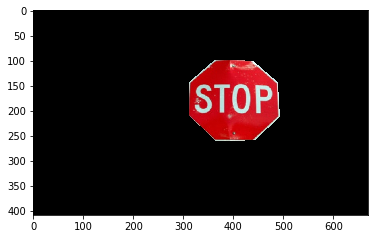

In [6]:
d = np.load('../trainset/5.npz')
print(d['MASK_STOP_SIGN'])
img = cv2.imread('../trainset/5.jpg')
oimg = img.copy()
img_area = img.shape[0] * img.shape[1]
img_ = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img[d['MASK_STOP_SIGN'] == 0, :] = 0
plt.imshow(img)
d['COLOR_STOP_RED'].shape